In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
data = pd.read_csv('data_interview.csv')
print(data)

        Unnamed: 0   date_time       event_name  level  \
0               40  10/28/2023       game_start      1   
1               41  10/28/2023       game_start      1   
2               42  10/28/2023       game_start      2   
3               43  10/28/2023       game_start      3   
4               44  10/28/2023       game_start      4   
...            ...         ...              ...    ...   
798327     7957940   11/3/2023  user_engagement      1   
798328     7957941   11/1/2023  user_engagement      1   
798329     7957942   11/1/2023  user_engagement      1   
798330     7957944   11/1/2023  user_engagement      1   
798331     7957952   11/3/2023  user_engagement      1   

                                        user  day_diff        day0 mode_game  \
0       1cffd052-4616-4d29-bfd5-950e23b763d4         0  10/28/2023    normal   
1       1cffd052-4616-4d29-bfd5-950e23b763d4         0  10/28/2023    normal   
2       1cffd052-4616-4d29-bfd5-950e23b763d4         0  10/28/2

In [50]:
print("Số dòng dữ liệu trong file CSV là:", len(data))

Số dòng dữ liệu trong file CSV là: 798332


SỬ DỤNG SQL LỌC DỮ LIỆU NGƯỜI CHƠI ĐÃ CHƠI TUTORIAL

In [51]:
playtutor = pd.read_csv('playtutor.csv')
print(playtutor)

        Unnamed: 0   date_time event_name  level  \
0          1381293  10/29/2023   game_end      5   
1          1381294  10/29/2023   game_end      7   
2          1381295  10/29/2023   game_end      2   
3          1381296  10/29/2023   game_end      1   
4          1381297  10/29/2023   game_end      3   
...            ...         ...        ...    ...   
242061     4122867   11/3/2023   game_end      4   
242062     4122868   11/4/2023   game_end      6   
242063     4122869   11/4/2023   game_end      6   
242064     4122870   11/6/2023   game_end      7   
242065     4122871   11/6/2023   game_end      7   

                                        user  day_diff        day0 mode_game  \
0       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0  10/29/2023    normal   
1       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0  10/29/2023    normal   
2       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0  10/29/2023    normal   
3       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0 

TỈ LỆ THUA TRONG 10 LEVELS ĐẦU PHIÊN BẢN 1.5.6

In [70]:
filtered_df152 = playtutor[(playtutor['version'] == '1.5.2') & (playtutor['level'] <= 10) & playtutor['win'].notnull()]
# Tính tỉ lệ thắng và tỉ lệ thua cho từng level
win_count152 = filtered_df152[filtered_df152['win'] == 1].groupby('level').size()
loss_count152 = filtered_df152[filtered_df152['win'] == 0].groupby('level').size()

# Tính tỉ lệ thắng và tỉ lệ thua
total_count152 = win_count152 + loss_count152
#win_rate152 = (win_count152 / total_count152) * 100
loss_rate152 = (loss_count152 / total_count152) * 100

print("loss count in first 10 levels")
print("Loss Count:", loss_count152.values)
#print("Win Count: ", win_count152.values)
print("Total Count:", total_count152.values)

print("\nloss rate at each level")
print(loss_rate152)
#print(win_rate152)

loss count in first 10 levels
Loss Count: [2119   69  201 1230 1322 1028 4197 2385  745  632]
Total Count: [8453 6250 5513 5865 5233 4407 6742 4516 2698 2445]

loss rate at each level
level
1     25.068023
2      1.104000
3      3.645928
4     20.971867
5     25.262756
6     23.326526
7     62.251557
8     52.812223
9     27.613047
10    25.848671
dtype: float64


TỈ LỆ THUA TRONG 10 LEVELS ĐẦU PHIÊN BẢN 1.6.0

In [54]:
filtered_df160 = playtutor[(playtutor['version'] == '1.6.0') & (playtutor['level'] <= 10) & playtutor['win'].notnull()]
# Tính tỉ lệ thắng và tỉ lệ thua cho từng level
win_count160 = filtered_df160[filtered_df160['win'] == 1].groupby('level').size()
loss_count160 = filtered_df160[filtered_df160['win'] == 0].groupby('level').size()

# Tính tỉ lệ thắng và tỉ lệ thua
total_count160 = win_count160 + loss_count160
#win_rate160 = (win_count160 / total_count160) * 100
loss_rate160 = (loss_count160 / total_count160) * 100

print("Loss Count:", loss_count160.values)
#print("Win Count: ", win_count160.values)
print("Total Count:", total_count160.values)
print(loss_rate160)
#print(win_rate160)

Loss Count: [1926   56  183 1536 1659 1471 4679 2511  805  823]
Total Count: [8439 6420 5768 6527 5877 5162 7527 4924 3039 2891]
level
1     22.822609
2      0.872274
3      3.172677
4     23.533017
5     28.228688
6     28.496707
7     62.162880
8     50.995126
9     26.488977
10    28.467658
dtype: float64


BIỂU ĐỒ CỘT KÉP SO SÁNH ĐỘ LỆCH DỮ LIỆU

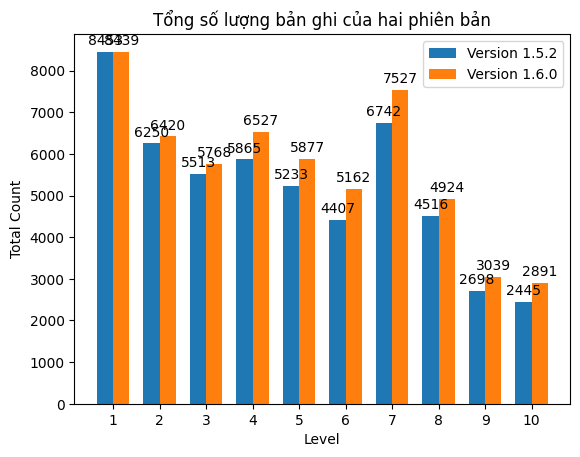

In [55]:
import matplotlib.pyplot as plt

# Tổng số lượng bản ghi của 1.5.2 và 1.6.0
total_count152_values = total_count152.values
total_count160_values = total_count160.values
levels = total_count152.index

# Vẽ biểu đồ cột kép
bar_width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(levels - bar_width/2, total_count152_values, bar_width, label='Version 1.5.2')
bars2 = ax.bar(levels + bar_width/2, total_count160_values, bar_width, label='Version 1.6.0')

# Thêm nhãn giá trị trên mỗi cột
for bar in bars1:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

# Đặt nhãn cho trục và tiêu đề biểu đồ
ax.set_xlabel('Level')
ax.set_ylabel('Total Count')
ax.set_title('Tổng số lượng bản ghi của hai phiên bản')
ax.set_xticks(levels)
ax.legend()

BIỂU ĐỒ ĐƯỜNG SO SÁNH TỈ LỆ CHẾT TRONG 10 LEVELS ĐẦU CỦA CẢ 2 PHIÊN BẢN

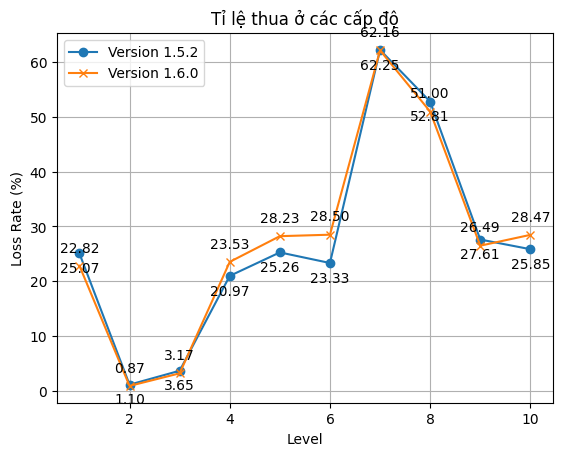

In [56]:
import matplotlib.pyplot as plt

# Dữ liệu từ phiên bản 1.5.2
levels152 = loss_rate152.index
loss_rate152_values = loss_rate152.values

# Dữ liệu từ phiên bản 1.6.0
levels160 = loss_rate160.index
loss_rate160_values = loss_rate160.values

# Vẽ biểu đồ đường
plt.plot(levels152, loss_rate152_values, marker='o', label='Version 1.5.2')
plt.plot(levels160, loss_rate160_values, marker='x', label='Version 1.6.0')

# Thêm nhãn cho mỗi điểm
for level, loss_rate152_value in zip(levels152, loss_rate152_values):
    plt.text(level, loss_rate152_value - 4, f'{loss_rate152_value:.2f}', ha='center', va='bottom')

for level, loss_rate160_value in zip(levels160, loss_rate160_values):
    plt.text(level, loss_rate160_value + 2, f'{loss_rate160_value:.2f}', ha='center', va='bottom')

plt.xlabel('Level')
plt.ylabel('Loss Rate (%)')
plt.title('Tỉ lệ thua ở các cấp độ')
plt.legend()
plt.grid(True)
plt.show()

BOXPLOT KIỂM TRA ĐỘ LỆCH CỦA DỮ LIỆU

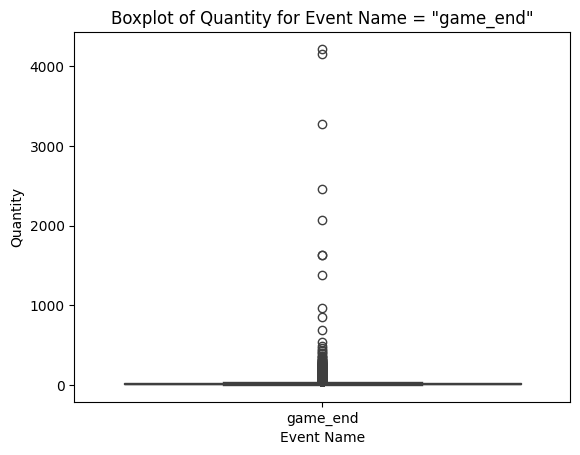

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lọc dữ liệu chỉ có event_name là 'game_end'
boxplot_data = data[(data['event_name'] == 'game_end') & (data['level'] <= 10) ]

# Xây dựng biểu đồ boxplot
sns.boxplot(data=boxplot_data, x='event_name', y='quantity')

plt.xlabel('Event Name')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity for Event Name = "game_end"')
plt.show()

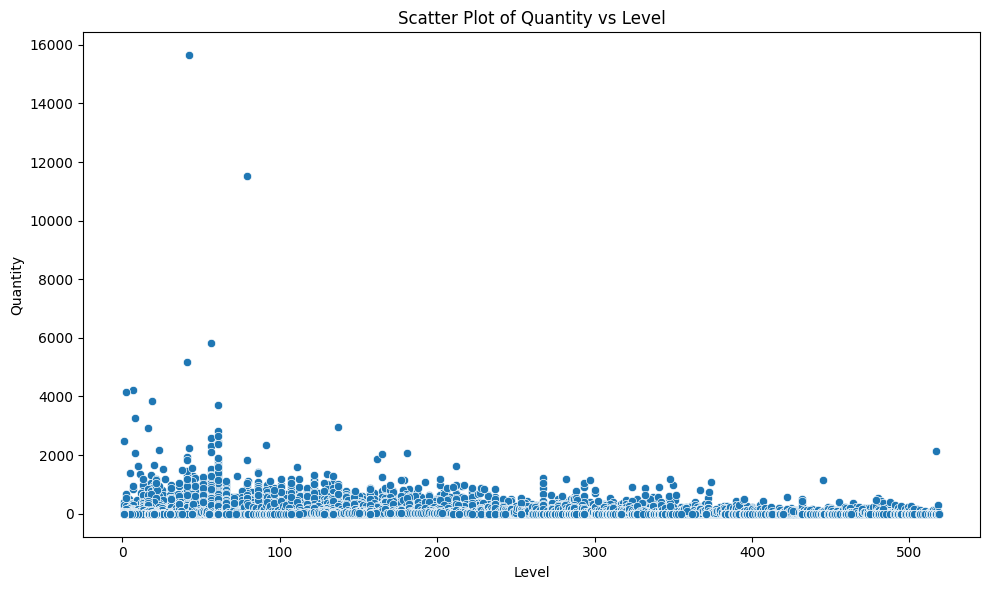

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Xây dựng biểu đồ scatter với kích thước lớn hơn
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data=data, x='level', y='quantity')
plt.xlabel('Level')
plt.ylabel('Quantity')
plt.title('Scatter Plot of Quantity vs Level')

plt.tight_layout()
plt.show()

THỰC HIỆN IQR XÓA DỮ LIỆU OUTLIERS VÀ LỌC THEO 10 LEVELS ĐẦU TIÊN

In [59]:
# Chuyển đổi cột 'quantity' sang dạng số
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')

# Tính toán phân vị 25 và 75
q1 = data['quantity'].quantile(0.25)
q3 = data['quantity'].quantile(0.75)

# Tính toán giá trị dưới và trên biên outlier
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Lọc dữ liệu để loại bỏ các giá trị outlier và giữ lại các dòng có event_name là 'game_end'
cleaned_data = data[(data['quantity'] >= lower_bound) & 
                    (data['quantity'] <= upper_bound) & 
                    (data['event_name'] == 'game_end')&
                    (data['level'] <= 10) ]

# Hiển thị thông tin của dữ liệu sau khi xóa outlier và lọc theo event_name
print("Số lượng dữ liệu sau khi xóa outlier và lọc event_name:", len(cleaned_data))


Số lượng dữ liệu sau khi xóa outlier và lọc event_name: 94096


In [60]:
print(cleaned_data)

        Unnamed: 0   date_time event_name  level  \
9               49  10/28/2023   game_end      1   
10              50  10/28/2023   game_end      2   
11              51  10/28/2023   game_end      3   
12              52  10/28/2023   game_end      4   
49             188  10/28/2023   game_end      1   
...            ...         ...        ...    ...   
795896     7501772   11/9/2023   game_end      4   
795897     7501773   11/9/2023   game_end      6   
795898     7501774   11/9/2023   game_end      5   
795899     7501775   11/9/2023   game_end      1   
795900     7501776   11/9/2023   game_end      3   

                                        user  day_diff        day0 mode_game  \
9       1cffd052-4616-4d29-bfd5-950e23b763d4         0  10/28/2023    normal   
10      1cffd052-4616-4d29-bfd5-950e23b763d4         0  10/28/2023    normal   
11      1cffd052-4616-4d29-bfd5-950e23b763d4         0  10/28/2023    normal   
12      1cffd052-4616-4d29-bfd5-950e23b763d4         0 

KIỂM TRA LẠI BOXPLOT

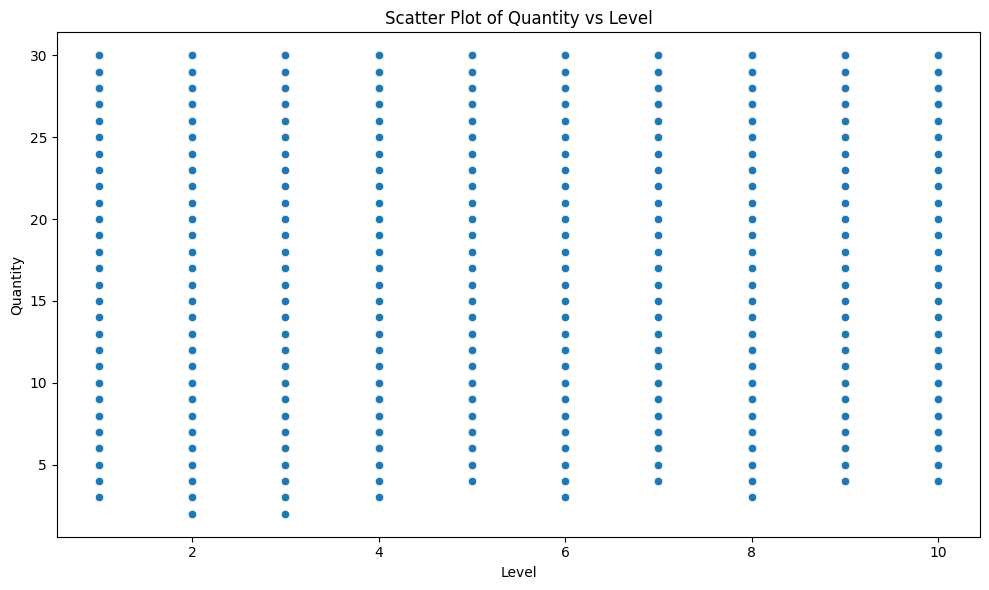

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Xây dựng biểu đồ scatter với kích thước lớn hơn
plt.figure(figsize=(10, 6)) 

sns.scatterplot(data=cleaned_data, x='level', y='quantity')
plt.xlabel('Level')
plt.ylabel('Quantity')
plt.title('Scatter Plot of Quantity vs Level')

plt.tight_layout()
plt.show()



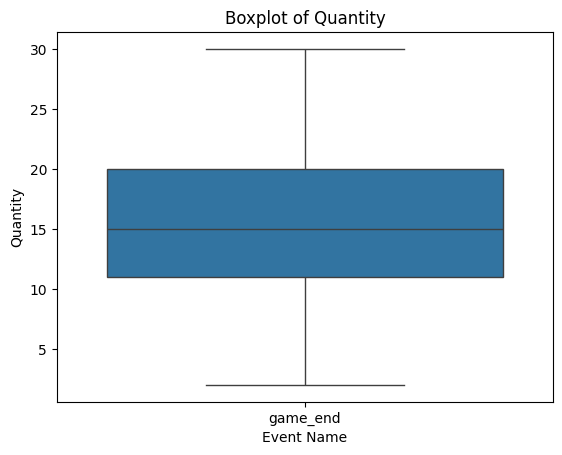

In [62]:
boxplot_data = cleaned_data[cleaned_data['event_name'] == 'game_end']

sns.boxplot(data=boxplot_data, x='event_name', y='quantity')

plt.xlabel('Event Name')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()

SO SÁNH THỜI GIAN MÀN CHƠI TỪNG LEVEL

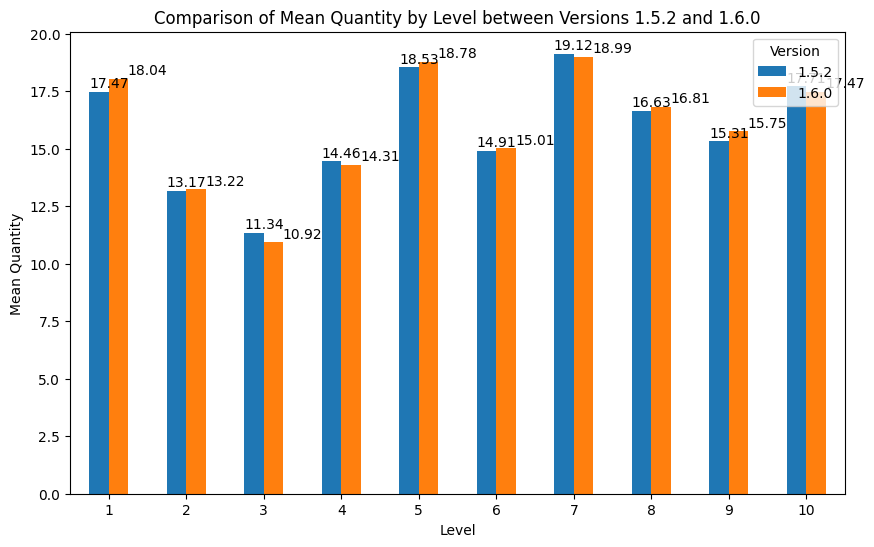

In [63]:
# Lọc dữ liệu cho phiên bản 1.5.2 và 1.6.0
version_152 = cleaned_data[cleaned_data['version'] == '1.5.2']
version_160 = cleaned_data[cleaned_data['version'] == '1.6.0']

# Tính trung bình quantity cho mỗi phiên bản và mỗi cấp độ
mean_quantity_152 = version_152.groupby('level')['quantity'].mean()
mean_quantity_160 = version_160.groupby('level')['quantity'].mean()

# Tạo DataFrame từ các giá trị trung bình
mean_quantity_comparison = pd.DataFrame({'1.5.2': mean_quantity_152, '1.6.0': mean_quantity_160})

# Vẽ biểu đồ grouped bar chart
ax = mean_quantity_comparison.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Level')
plt.ylabel('Mean Quantity')
plt.title('Comparison of Mean Quantity by Level between Versions 1.5.2 and 1.6.0')
plt.xticks(rotation=0)  # Để xoay nhãn trục x
plt.legend(title='Version')

# Thêm nhãn cho từng cột
for index, value in enumerate(mean_quantity_comparison.values):
    for i, val in enumerate(value):
        ax.text(index + i/2, val + 0.05, str(round(val, 2)), ha='center', va='bottom')

plt.show()

TỈ LỆ QUAY LẠI GAME VÀO NHỮNG NGÀY SAU

In [64]:
datadaydiff = pd.read_csv('distinct_daydiff.csv')

In [67]:
print(len(datadaydiff))

23096


In [69]:
print(playtutor)

        Unnamed: 0   date_time event_name  level  \
0          1381293  10/29/2023   game_end      5   
1          1381294  10/29/2023   game_end      7   
2          1381295  10/29/2023   game_end      2   
3          1381296  10/29/2023   game_end      1   
4          1381297  10/29/2023   game_end      3   
...            ...         ...        ...    ...   
242061     4122867   11/3/2023   game_end      4   
242062     4122868   11/4/2023   game_end      6   
242063     4122869   11/4/2023   game_end      6   
242064     4122870   11/6/2023   game_end      7   
242065     4122871   11/6/2023   game_end      7   

                                        user  day_diff        day0 mode_game  \
0       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0  10/29/2023    normal   
1       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0  10/29/2023    normal   
2       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0  10/29/2023    normal   
3       2a873a5a-e1c1-48db-8fc3-75e19fe1e7f7         0 

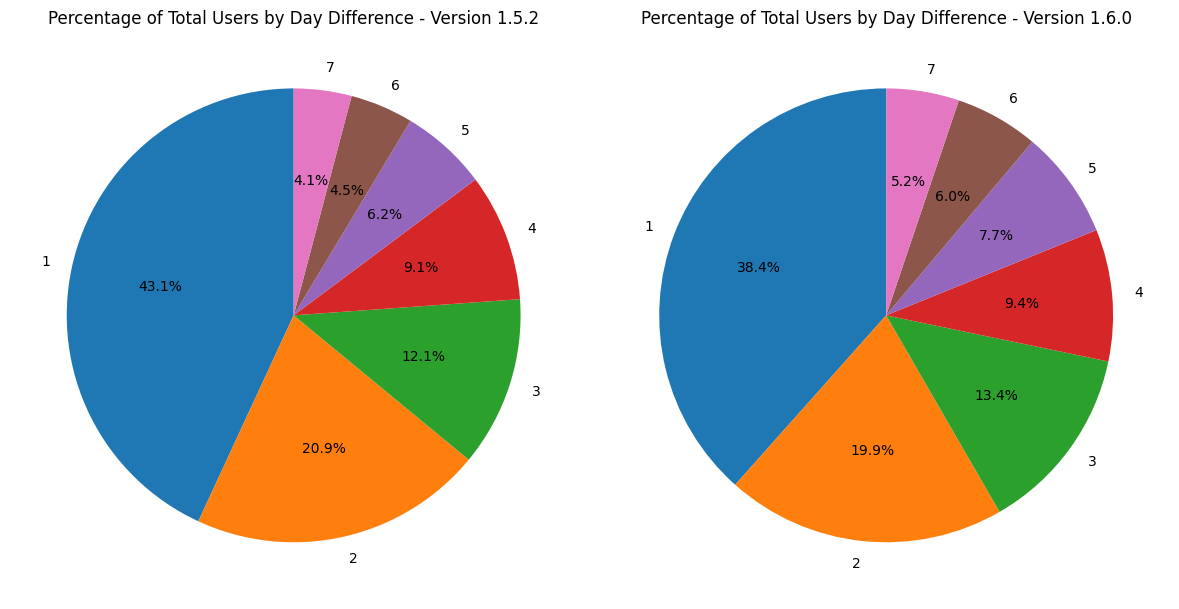

In [68]:
# Lọc dữ liệu cho phiên bản 1.5.2 và loại bỏ ngày có day_diff là 0
filtered_data_152 = playtutor[(playtutor['version'] == '1.5.2') & (playtutor['day_diff'] != 0)]

# Lọc dữ liệu cho phiên bản 1.6.0 và loại bỏ ngày có day_diff là 0
filtered_data_160 = playtutor[(playtutor['version'] == '1.6.0') & (playtutor['day_diff'] != 0)]

# Tính tổng số người chơi trong mỗi ngày day_diff cho phiên bản 1.5.2
total_users_per_day_152 = filtered_data_152.groupby('day_diff')['user'].nunique()

# Tính tổng số người chơi trong mỗi ngày day_diff cho phiên bản 1.6.0
total_users_per_day_160 = filtered_data_160.groupby('day_diff')['user'].nunique()

# Tạo biểu đồ pie chart cho phiên bản 1.5.2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(total_users_per_day_152, labels=total_users_per_day_152.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Users by Day Difference - Version 1.5.2')

# Tạo biểu đồ pie chart cho phiên bản 1.6.0
plt.subplot(1, 2, 2)
plt.pie(total_users_per_day_160, labels=total_users_per_day_160.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Users by Day Difference - Version 1.6.0')

plt.tight_layout()
plt.show()